In [2]:
#Import libraries
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup

import geopy
from geopy.geocoders import Nominatim

In [3]:
#Wikipedia website link

url = "https://en.wikipedia.org/wiki/List_of_motorcycle_manufacturers"

country_bike = {} 

In [4]:
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")

In [5]:
#Extraction and save country and in dictionary

for x in soup.find_all('h3'):
  
  if hasattr(x.findChild("span"),'id'):
    
    country = str(x.findChild("span")['id']) #+ str("_country") 
    company = []
    for li in x.findNextSibling():
      
      company.append(li.find_next('a')['title']) 
      
    company = list(set(company))
    country_bike[country] = company

  else:
    break

In [6]:
country_bike['India']

['Honda Motorcycle and Scooter India',
 'Royal Enfield (India)',
 'Moto Guzzi',
 'Triumph Motorcycles Ltd',
 'Suzuki Motorcycle India Limited',
 'KTM',
 'Yamaha Motor India',
 'Hero MotoCorp',
 'BMW India',
 'Vespa',
 'MV Agusta',
 'Harley-Davidson India',
 'Jawa Moto',
 'Norton Motorcycle Company',
 'TVS Motor Company',
 'India Kawasaki Motors',
 'Hyosung Motors & Machinery Inc.',
 'Bajaj Auto',
 'Ducati',
 'Benelli (motorcycles)',
 'Aprilia',
 'Mahindra Two Wheelers']

In [7]:
import tweepy

#Add your credentials here
twitter_keys = {
        'consumer_key':        'o9OwWjiOukxq0FUGxkiQBfYIG',
        'consumer_secret':     'ETAVneQWZKl8P92E8hMM6nRjX2PjUxjZbbbbp8DQx1XOtT0vJ6',
        'access_token_key':    '195257267-gRf3Z4LzQxi1Rsd7JzSzX6z5AynGILx9Gau7athR',
        'access_token_secret': 'mTM4Y2nYSc9F2AWdz2gE3ZTETxGIZIlqaU2bE8LK7PFbV'
    }

#Setup access to API
auth = tweepy.OAuthHandler(twitter_keys['consumer_key'], twitter_keys['consumer_secret'])
auth.set_access_token(twitter_keys['access_token_key'], twitter_keys['access_token_secret'])

#api = tweepy.API(auth)

#Make call on home timeline, print each tweets text
#public_tweets = api.home_timeline()
#for tweet in public_tweets:
#    print(tweet.text)

In [8]:
country_bike['India'][0]

'Honda Motorcycle and Scooter India'

In [80]:
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
#places = api.geo_search(query="INDIA", granularity="country")
#place = places[0].id
searchString = country_bike['India'][0] #+ " bike" #+ '-filter:retweets' 

cursor = tweepy.Cursor(api.search, geocode="22.3511148,78.6677428,10000km",q=searchString , count=5, lang="en", tweet_mode='extended')

maxCount = 200
count = 0


'''for tweet in cursor.items():    
    print()
    print("Tweet Information")
    print("================================")
    print("Text: ", tweet.full_text)
    print("Geo: ", tweet.geo)
    print("Coordinates: ", tweet.coordinates)
    print("Place: ", tweet.place)
    print()
    print("User Information")
    print("================================")
    print("Location: ", tweet.user.location)
    print("Geo Enabled? ", tweet.user.geo_enabled)
    count = count + 1
    if count == maxCount:
        break;'''

'for tweet in cursor.items():    \n    print()\n    print("Tweet Information")\n    print("================================")\n    print("Text: ", tweet.full_text)\n    print("Geo: ", tweet.geo)\n    print("Coordinates: ", tweet.coordinates)\n    print("Place: ", tweet.place)\n    print()\n    print("User Information")\n    print("================================")\n    print("Location: ", tweet.user.location)\n    print("Geo Enabled? ", tweet.user.geo_enabled)\n    count = count + 1\n    if count == maxCount:\n        break;'

In [79]:
for tweet in cursor.items(): 
    print(tweet)
    print()
    print("Tweet Information")
    print("================================")
    print("Text: ", tweet.full_text)
    print("Geo: ", tweet.geo)
    print("Coordinates: ", tweet.coordinates)
    print("Place: ", tweet.place)
    print()
    print("User Information")
    print("================================")
    print("Location: ", tweet.user.location)
    print("Geo Enabled? ", tweet.user.geo_enabled)
    count = count + 1
    if count == maxCount:
        break;

In [59]:
searchString

'Vespa bike'

# save the tweets in to csv 

In [37]:
count


23

In [42]:
countries_list = list(country_bike.keys())[0:32]

In [13]:
geolocator = Nominatim(user_agent="bike")
loc_ireland = geolocator.geocode("Ireland")
loc_uk = geolocator.geocode("uk")
loc_india = geolocator.geocode("india")

In [15]:
loc_india.raw

{'place_id': 235416856,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'relation',
 'osm_id': 304716,
 'boundingbox': ['6.2325274', '35.6745457', '68.1113787', '97.395561'],
 'lat': '22.3511148',
 'lon': '78.6677428',
 'display_name': 'India',
 'class': 'boundary',
 'type': 'administrative',
 'importance': 0.947689135880987,
 'icon': 'https://nominatim.openstreetmap.org/images/mapicons/poi_boundary_administrative.p.20.png'}

In [57]:
from geopy.distance import great_circle
newport_ri = (loc_ireland.latitude, loc_ireland.longitude)
cleveland_oh = (loc_uk.latitude, loc_ireland.longitude)
print(great_circle(newport_ri, cleveland_oh).miles)


126.9355670522334


# Just an another day .... Practise Twitter 

In [38]:
import tweepy

# Variables that contains the credentials to access Twitter API
ACCESS_TOKEN = '195257267-gRf3Z4LzQxi1Rsd7JzSzX6z5AynGILx9Gau7athR'
ACCESS_SECRET = 'mTM4Y2nYSc9F2AWdz2gE3ZTETxGIZIlqaU2bE8LK7PFbV'
CONSUMER_KEY = 'o9OwWjiOukxq0FUGxkiQBfYIG'
CONSUMER_SECRET = 'ETAVneQWZKl8P92E8hMM6nRjX2PjUxjZbbbbp8DQx1XOtT0vJ6'


# Setup access to API
def connect_to_twitter_OAuth():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    api = tweepy.API(auth)
    return api


# Create API object
api = connect_to_twitter_OAuth()

In [39]:
public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

THE ScarJo doppleganger!  Via @InTheKnow https://t.co/Yyi22gmjyH
We should convert the covid-19 pandemic into an opportunity to build a solid healthcare system. We must be much bet… https://t.co/5dvHaLBPWh
As global oil prices plummet, there is windfall gain in tax receipts from fuel. These windfall revenues should be d… https://t.co/HEKfM8joBi
RT @JamesMelville: Behave as if you might be spreading it, not as if you’re trying to avoid it.
#Coronavirus
RT @teasri: This is what is needed--at least for restaurants and other small businesses, and affected self-employed.
Who says #SelfQuarantine has to be lonely? Join over 600,000 entertainment creatives and professionals in the Stage… https://t.co/wDnT6qondl
Maybe worth considering chloroquine for C19 https://t.co/LEYob7Jofr
RT @WIONews: #Gravitas | The video conference between SAARC leaders was an opportunity to discuss solutions to tackle the coronavirus outbr…
GoPro + Helmet = one productive pooch. Via @InTheKnow https://t.co/ZAVc9dBnVb

In [40]:
# tweets from a specific user
trump_tweets = api.user_timeline('realdonaldtrump')
for tweet in trump_tweets:
    print(tweet.text)

The United States will be powerfully supporting those industries, like Airlines and others, that are particularly a… https://t.co/D7qJthFJYH
I ask all Americans to band together and support your neighbors by not hoarding unnecessary amounts of food and ess… https://t.co/YwJwqf2np7
Yesterday I spoke with the great American Grocers and Supply Chain Executives. We are confident that supply will co… https://t.co/RXZbI62orN
https://t.co/tit0HdkE4e
https://t.co/ZLmk41FA3H
Just had a  very good tele-conference with Nation’s Governors. Went very well. Cuomo of New York has to “do more”.
Everybody is so well unified and working so hard. It is a beautiful thing to see. They love our great Country. We w… https://t.co/7zIZw2Ykig
God Bless the USA!
RT @parscale: Joe Biden is a train wreck on illegal immigration and would harm national security.

He’d have ZERO deportations for the firs…
RT @TimMurtaugh: Joe Biden would set an extreme and dangerous course on illegal immigration.

Wouldn’t deport any

In [43]:
# fuction to extract data from tweet object
def extract_tweet_attributes(tweet_object):
    # create empty list
    tweet_list =[]
    # loop through tweet objects
    for tweet in tweet_object:
        tweet_id = tweet.id # unique integer identifier for tweet
        text = tweet.text # utf-8 text of tweet
        favorite_count = tweet.favorite_count
        retweet_count = tweet.retweet_count
        created_at = tweet.created_at # utc time tweet created
        source = tweet.source # utility used to post tweet
        reply_to_status = tweet.in_reply_to_status_id # if reply int of orginal tweet id
        reply_to_user = tweet.in_reply_to_screen_name # if reply original tweetes screenname
        retweets = tweet.retweet_count # number of times this tweet retweeted
        favorites = tweet.favorite_count # number of time this tweet liked
        # append attributes to list
        tweet_list.append({'tweet_id':tweet_id, 
                          'text':text, 
                          'favorite_count':favorite_count,
                          'retweet_count':retweet_count,
                          'created_at':created_at, 
                          'source':source, 
                          'reply_to_status':reply_to_status, 
                          'reply_to_user':reply_to_user,
                          'retweets':retweets,
                          'favorites':favorites})
    # create dataframe   
    df = pd.DataFrame(tweet_list, columns=['tweet_id',
                                           'text',
                                           'favorite_count',
                                           'retweet_count',
                                           'created_at',
                                           'source',
                                           'reply_to_status',
                                           'reply_to_user',
                                           'retweets',
                                           'favorites'])
    return df


df = extract_tweet_attributes(trump_tweets)

In [44]:
df.head()

,tweet_id,text,favorite_count,retweet_count,created_at,source,reply_to_status,reply_to_user,retweets,favorites
0,1239685852093169664,The United States will be powerfully supportin...,88734,19636,2020-03-16 22:51:54,Twitter for iPhone,None,None,19636,88734
1,1239650086491230209,I ask all Americans to band together and suppo...,146191,33295,2020-03-16 20:29:46,Twitter for iPhone,None,None,33295,146191
2,1239650018832891905,Yesterday I spoke with the great American Groc...,68831,16085,2020-03-16 20:29:30,Twitter for iPhone,None,None,16085,68831
3,1239646763222474754,https://t.co/tit0HdkE4e,41941,14737,2020-03-16 20:16:34,Twitter for iPhone,None,None,14737,41941
4,1239646718624436237,https://t.co/ZLmk41FA3H,31781,11277,2020-03-16 20:16:23,Twitter for iPhone,None,None,11277,31781


In [54]:
#api = tweepy.API(auth)
places = api.geo_search(query="INDIA", granularity="country")
place_id = places[0].id

tweets = api.search(q="place:%s" % place_id + "Yamaha")
for tweet in tweets:
    print(tweet.text + " | " + tweet.place.name if tweet.place else "Undefined place")

In [ ]:
searchString = country_bike['India'][0] #+ " bike" #+ '-filter:retweets' 

cursor = tweepy.Cursor(api.search, geocode="22.3511148,78.6677428,10000km",q=searchString , count=5, lang="en", tweet_mode='extended')

In [49]:
df = extract_tweet_attributes(tweets)

In [50]:
df.head()

,tweet_id,text,favorite_count,retweet_count,created_at,source,reply_to_status,reply_to_user,retweets,favorites
0,1239716362303537152,NEW: There are 566 cases of coronavirus in Mal...,0,0,2020-03-17 00:53:08,Twitter for Android,NaN,None,0,0
1,1239716356523569152,Ram Ram https://t.co/m2iveLeK1V,0,0,2020-03-17 00:53:06,Twitter for Android,NaN,None,0,0
2,1239716343332528128,@Iambikramsahoo @bishnu_dash04 କୋଉ ନଳ ପାଣି ପିଉ...,0,0,2020-03-17 00:53:03,Twitter for Android,1.239607e+18,Iambikramsahoo,0,0
3,1239716342904664064,Only change your breakfast loss your weight ch...,0,0,2020-03-17 00:53:03,Twitter for Android,NaN,None,0,0
4,1239716315356676096,"JUST IN: Over 1,350 prisoners escaped from Bra...",0,0,2020-03-17 00:52:57,Twitter for Android,NaN,None,0,0


In [51]:
"place:%s" % place_id

'place:b850c1bfd38f30e0'

In [52]:
df

,tweet_id,text,favorite_count,retweet_count,created_at,source,reply_to_status,reply_to_user,retweets,favorites
0,1239716362303537152,NEW: There are 566 cases of coronavirus in Mal...,0,0,2020-03-17 00:53:08,Twitter for Android,NaN,None,0,0
1,1239716356523569152,Ram Ram https://t.co/m2iveLeK1V,0,0,2020-03-17 00:53:06,Twitter for Android,NaN,None,0,0
2,1239716343332528128,@Iambikramsahoo @bishnu_dash04 କୋଉ ନଳ ପାଣି ପିଉ...,0,0,2020-03-17 00:53:03,Twitter for Android,1.239607e+18,Iambikramsahoo,0,0
3,1239716342904664064,Only change your breakfast loss your weight ch...,0,0,2020-03-17 00:53:03,Twitter for Android,NaN,None,0,0
4,1239716315356676096,"JUST IN: Over 1,350 prisoners escaped from Bra...",0,0,2020-03-17 00:52:57,Twitter for Android,NaN,None,0,0
5,1239716314685386752,@NavyaDua @PMOIndia @WHO Home service chahiye?,0,0,2020-03-17 00:52:56,Twitter for Android,1.239381e+18,NavyaDua,0,0
6,1239716309257994240,@HansrajMeena @Real_Anuj 🤮,0,0,2020-03-17 00:52:55,Twitter for Android,1.239588e+18,HansrajMeena,0,0
7,1239716302387740672,@latha98944 @siddusayss Arasiyal la anaaathaya...,0,0,2020-03-17 00:52:53,Twitter for Android,1.239715e+18,latha98944,0,0
8,1239716301230096384,@myogioffice @myogiadityanath जय श्री राम \nम...,0,0,2020-03-17 00:52:53,Twitter for Android,1.239581e+18,myogioffice,0,0


In [55]:
places

[Place(_api=<tweepy.api.API object at 0x114e7bdd8>, id='b850c1bfd38f30e0', url='https://api.twitter.com/1.1/geo/id/b850c1bfd38f30e0.json', place_type='country', name='India', full_name='India', country_code='IN', country='India', contained_within=[], centroid=[79.91569416233017, 20.568453], bounding_box=BoundingBox(_api=<tweepy.api.API object at 0x114e7bdd8>, type='Polygon', coordinates=[[[67.997691, 6.622513], [67.997691, 33.254896], [97.170672, 33.254896], [97.170672, 6.622513], [67.997691, 6.622513]]]), attributes={}),
 Place(_api=<tweepy.api.API object at 0x114e7bdd8>, id='88f6c97979c5c22d', url='https://api.twitter.com/1.1/geo/id/88f6c97979c5c22d.json', place_type='country', name='British Indian Ocean Territory', full_name='British Indian Ocean Territory', country_code='IO', country='British Indian Ocean Territory', contained_within=[], centroid=[71.3834071192206, -6.684143000000001], bounding_box=BoundingBox(_api=<tweepy.api.API object at 0x114e7bdd8>, type='Polygon', coordinates

In [62]:
df = extract_tweet_attributes(cursor.items())

In [63]:
df

,tweet_id,text,favorite_count,retweet_count,created_at,source,reply_to_status,reply_to_user,retweets,favorites


In [68]:
cursor.items()

In [211]:
# fuction to extract data from tweet object
def extract_tweet_attributes_x(tweet_object):
    # create empty list
    tweet_list =[]
    # loop through tweet objects
    for tweet in tweet_object:
        tweet_id = tweet.id # unique integer identifier for tweet
        text = tweet.full_text # utf-8 text of tweet
        favorite_count = tweet.favorite_count
        retweet_count = tweet.retweet_count
        created_at = tweet.created_at # utc time tweet created
        source = tweet.source # utility used to post tweet
        reply_to_status = tweet.in_reply_to_status_id # if reply int of orginal tweet id
        reply_to_user = tweet.in_reply_to_screen_name # if reply original tweetes screenname
        retweets = tweet.retweet_count # number of times this tweet retweeted
        favorites = tweet.favorite_count # number of time this tweet liked
        # append attributes to list
        tweet_list.append({'tweet_id':tweet_id, 
                          'text':text, 
                          'favorite_count':favorite_count,
                          'retweet_count':retweet_count,
                          'created_at':created_at, 
                          'source':source, 
                          'reply_to_status':reply_to_status, 
                          'reply_to_user':reply_to_user,
                          'retweets':retweets,
                          'favorites':favorites})
    # create dataframe   
    df = pd.DataFrame(tweet_list, columns=['tweet_id',
                                           'text',
                                           'favorite_count',
                                           'retweet_count',
                                           'created_at',
                                           'source',
                                           'reply_to_status',
                                           'reply_to_user',
                                           'retweets',
                                           'favorites'])
    return df


df = extract_tweet_attributes(trump_tweets)

In [83]:
extract_tweet_attributes_x(cursor.items())

,tweet_id,text,favorite_count,retweet_count,created_at,source,reply_to_status,reply_to_user,retweets,favorites
0,1237963401575272451,@RekhaBasavaraju In small town vespa service c...,1,0,2020-03-12 04:47:29,Twitter for Android,1.237962e+18,RekhaBasavaraju,0,1
1,1237959361432924160,@RekhaBasavaraju Buy Jupiter or Activa125 BS6 ...,2,0,2020-03-12 04:31:26,Twitter for Android,1.237760e+18,RekhaBasavaraju,0,2
2,1237950731522437120,@RekhaBasavaraju Pink colour Vespa 😍💖,1,0,2020-03-12 03:57:09,Twitter for iPhone,1.237760e+18,RekhaBasavaraju,0,1
3,1237924967175434240,"@RekhaBasavaraju Mam TVS jupiter tagolli , bef...",1,0,2020-03-12 02:14:46,Twitter for Android,1.237760e+18,RekhaBasavaraju,0,1
4,1237829217212985346,Anyone born in the 80's and remembers the Rasn...,2,2,2020-03-11 19:54:17,Twitter for Android,NaN,None,2,2
5,1237775118807388160,Suzuki - smooth \nVespa - classy and strong \n...,0,0,2020-03-11 16:19:19,Twitter for Android,NaN,None,0,0
6,1237693572708577281,Vespa Elettrica Electric Scooter | THE ELECTRI...,1,0,2020-03-11 10:55:17,Twitter Web Client,NaN,None,0,1
7,1237628560489111552,@SatyaPsamal @Vespa_Official Dear Satyaprakash...,0,0,2020-03-11 06:36:57,TweetDeck,1.236418e+18,SatyaPsamal,0,0
8,1236946458227560451,RT @Vespa_IN: Your Vespa won’t ever be out of ...,0,3,2020-03-09 09:26:31,Twitter for Android,NaN,None,3,0
9,1236898003509624833,"@Vespa_IN 9840708307, I had suffered a lot. I ...",0,0,2020-03-09 06:13:59,Twitter for Android,1.236897e+18,Vespa_IN,0,0


In [93]:
searchString = country_bike['India'][-3]+ '-filter:retweets' #+ " bike" #+ '-filter:retweets' 

cursor = tweepy.Cursor(api.search, geocode="22.3511148,78.6677428,10000km",q=searchString  , count=5, lang="en", tweet_mode='extended')
extract_tweet_attributes_x(cursor.items())

,tweet_id,text,favorite_count,retweet_count,created_at,source,reply_to_status,reply_to_user,retweets,favorites
0,1239503608477073408,First Women Royal Enfield Mechanic In India | ...,1,0,2020-03-16 10:47:43,Twitter Web App,NaN,None,0,1
1,1239136759579099137,Delhi man fined for owning a Royal Enfield Bul...,163,11,2020-03-15 10:30:00,TweetDeck,NaN,None,11,163
2,1238903808865882112,RE vs others!\n\nA Motorcycle Made in India Gi...,0,0,2020-03-14 19:04:20,Twitter for Android,NaN,None,0,0
3,1238097300318064642,#RoyalEnfield J1D Motorcycle to Launch in Indi...,0,0,2020-03-12 13:39:33,Twitter Web App,NaN,None,0,0
4,1237802008431579136,@I_M_SOUMYA @INCMumbai @ShashiTharoor @ProfCon...,1,0,2020-03-11 18:06:10,Twitter for Android,1.237773e+18,I_M_SOUMYA,0,1
5,1237667116217593860,@ravinesun @royalenfield Thank you so much for...,2,0,2020-03-11 09:10:09,Twitter Web App,1.237610e+18,ravinesun,0,2


In [87]:
searchString


'Hyosung Motors & Machinery Inc.'

In [90]:
country_bike['India']

['Vespa',
 'Hyosung Motors & Machinery Inc.',
 'India Kawasaki Motors',
 'KTM',
 'BMW India',
 'TVS Motor Company',
 'MV Agusta',
 'Suzuki Motorcycle India Limited',
 'Moto Guzzi',
 'Yamaha Motor India',
 'Benelli (motorcycles)',
 'Harley-Davidson India',
 'Jawa Moto',
 'Aprilia',
 'Mahindra Two Wheelers',
 'Ducati',
 'Bajaj Auto',
 'Norton Motorcycle Company',
 'Honda Motorcycle and Scooter India',
 'Royal Enfield (India)',
 'Hero MotoCorp',
 'Triumph Motorcycles Ltd']


## Okay ... Seems like  its getting there!!!! 

# Things that needs to be done -

<font color='green'>0) Get the current location from the country list</font>


1) create dataframes in for loop based on location --> country --> bikes

2) Get the sentiments of it 

3) Visualize as much as you can 

4) Put the code in shareable format 

5) Upload in github proudly with readme file including insights from visuals 

6) Upload in my website



# Get the current location from the country list

In [9]:
location = list(country_bike.keys())

In [10]:

location = [x.replace('_', ' ') for x in location]
location = location[:32]

In [11]:
from  geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="bike_craze")
#city ="London"
loc = geolocator.geocode("India")
print("latitude is :-" ,loc.latitude,"\nlongtitude is:-" ,loc.longitude)

latitude is :- 22.3511148 
longtitude is:- 78.6677428


In [12]:
lat_lon = {}
from time import sleep

for place in location:
    print(place)
    sleep(0.5)
    loc = geolocator.geocode(place)
    lat_lon[place] = (loc.latitude,loc.longitude)
    print("okay")
    

Argentina
okay
Australia
okay
Austria
okay
Bangladesh
okay
Belarus
okay
Brazil
okay
Canada
okay
China
okay
Colombia
okay
Czech Republic
okay
France
okay
Germany
okay
India
okay
Indonesia
okay
Italy
okay
Japan
okay
South Korea
okay
Malaysia
okay
Mexico
okay
Pakistan
okay
Philippines
okay
Poland
okay
Portugal
okay
Russia
okay
Slovenia
okay
Spain
okay
Taiwan
okay
Thailand
okay
Turkey
okay
Ukraine
okay
United Kingdom
okay
United States
okay


In [118]:
lat_lon

{'Argentina': (-34.9964963, -64.9672817),
 'Australia': (-24.7761086, 134.755),
 'Austria': (47.2000338, 13.199959),
 'Bangladesh': (24.4768598, 90.2932299),
 'Belarus': (53.4250605, 27.6971358),
 'Brazil': (-10.3333333, -53.2),
 'Canada': (61.0666922, -107.9917071),
 'China': (35.000074, 104.999927),
 'Colombia': (2.8894434, -73.783892),
 'Czech Republic': (49.8167003, 15.4749544),
 'France': (46.603354, 1.8883335),
 'Germany': (51.0834196, 10.4234469),
 'India': (22.3511148, 78.6677428),
 'Indonesia': (-2.4833826, 117.8902853),
 'Italy': (42.6384261, 12.674297),
 'Japan': (36.5748441, 139.2394179),
 'South Korea': (36.638392, 127.6961188),
 'Malaysia': (4.5693754, 102.2656823),
 'Mexico': (19.4326296, -99.1331785),
 'Pakistan': (30.3308401, 71.247499),
 'Philippines': (12.7503486, 122.7312101),
 'Poland': (52.215933, 19.134422),
 'Portugal': (40.0332629, -7.8896263),
 'Russia': (64.6863136, 97.7453061),
 'Slovenia': (45.8133113, 14.4808369),
 'Spain': (39.3262345, -4.8380649),
 'Taiw

In [13]:
import geocoder
g = geocoder.ip('me')
print(g.latlng)

[53.3331, -6.2489]


In [18]:
c = geolocator.reverse((g.latlng))

In [19]:
c.raw['address']['country']

'Ireland'

In [133]:
list(c)[-2]

'Bank of Ireland, 40, Mespil Road, Baggotrath East, Pembroke West C ED, Dublin 4, Dublin, County Dublin, Leinster, D04 Y9Y7, Ireland'

In [140]:
loc = geolocator.geocode(c.raw['address']['country'])

In [155]:
my_loc = tuple(g.latlng)

In [145]:
from geopy.distance import geodesic as dist

In [150]:
dist(lat_lon['Argentina'],lat_lon['Australia']).km

13071.624348826268

In [156]:
distances = {}

In [162]:
for loc,coord in lat_lon.items():
    sleep(1)
    distance =  dist(coord,my_loc).km
    distances[loc] = distance

    

In [163]:
distances

{'Argentina': 11303.218252266914,
 'Australia': 15479.551214037041,
 'Austria': 1538.674060461181,
 'Bangladesh': 8277.555053324984,
 'Belarus': 2237.5638284527854,
 'Brazil': 8333.480919193014,
 'Canada': 5575.303864396685,
 'China': 8201.050760897371,
 'Colombia': 8273.668909601089,
 'Czech Republic': 1549.3236768394954,
 'France': 948.0088606283837,
 'Germany': 1163.9818197810544,
 'India': 7713.985302474533,
 'Indonesia': 12424.085707762482,
 'Italy': 1836.3007524919487,
 'Japan': 9503.477882576979,
 'South Korea': 9096.209852338407,
 'Malaysia': 10813.410146596005,
 'Mexico': 8484.828342229905,
 'Pakistan': 6561.58397808654,
 'Philippines': 11234.825714725777,
 'Poland': 1708.4594047455257,
 'Portugal': 1483.682372110433,
 'Russia': 5405.328234103847,
 'Slovenia': 1707.8386661397747,
 'Spain': 1560.6728721305794,
 'Taiwan': 10082.449341819296,
 'Thailand': 9785.614238709435,
 'Turkey': 3495.1534039958624,
 'Ukraine': 2614.144223905074,
 'United Kingdom': 247.32225488085538,
 'Unit

In [169]:
x =min(distances.values())

In [193]:
your_place = ""
for name, d in distances.items():
    if d == x:
        print(name)
        your_location = name.replace(" ","_")
        your_place = name
        

United Kingdom


# Things that needs to be done -

<font color='red'>0) <s>Get the current location from the country list     Got the nearest country </s></font>


<font color='green'>1) create dataframes in for loop based on location --> country --> bikes </font>

2) Get the sentiments of it 

3) Visualize as much as you can 

4) Put the code in shareable format 

5) Upload in github proudly with readme file including insights from visuals 

6) Upload in my website

In [194]:
gc = list(lat_lon[your_place])
gc = (str(gc[0])+ "," +str(gc[1])+ "," + "1000km")

In [219]:
df_1 = {}

In [269]:
for v in country_bike[your_location]:
    print(v)
    sleep(1)
    searchString = v.split()[0]+ " bike" +'-filter:retweets' #+ " bike" #+ '-filter:retweets' 
    cursor = tweepy.Cursor(api.search, geocode=gc,q=searchString  , count=200, lang="en", tweet_mode='extended')
    #df = "bike " + v 
    
    df_1[v] = extract_tweet_attributes_x(cursor.items())
    

AJS
Cheney Racing
Norton Motorcycle Company
Clews Competition Motorcycles
Hesketh Motorcycles
Ariel Motor Company
Triumph Motorcycles Ltd
Wasp Motorcycles
Megelli Motorcycles
Greeves (motorcycles)
Métisse Motorcycles


In [270]:
searchString

'Métisse bike-filter:retweets'

In [216]:
cursor = tweepy.Cursor(api.search, geocode=gc,q="AJS"  , count=2, lang="en", tweet_mode='extended')

In [217]:
extract_tweet_attributes_x(cursor.items())

,tweet_id,text,favorite_count,retweet_count,created_at,source,reply_to_status,reply_to_user,retweets,favorites
0,1239937732354473984,"@Dinouk Yes, at the moment Scandal will be my ...",0,0,2020-03-17 15:32:46,Twitter for iPhone,1.239938e+18,Dinouk,0,0
1,1239937600783364097,@AJS__Adam Well see you at Scandal then in Sep...,0,0,2020-03-17 15:32:15,Twitter for Android,1.239937e+18,AJS__Adam,0,0
2,1239937259413135361,@Dinouk I’ve pretty much cancelled all my even...,0,0,2020-03-17 15:30:54,Twitter for iPhone,1.239937e+18,Dinouk,0,0
3,1239936971876847616,@AJS__Adam Yes and she doesn't do many solo sh...,1,0,2020-03-17 15:29:45,Twitter for Android,1.239936e+18,AJS__Adam,0,1
4,1239935621176659969,@Dinouk There was something special about Rei ...,1,0,2020-03-17 15:24:23,Twitter for iPhone,1.239935e+18,Dinouk,0,1
5,1239934883604152320,@AJS__Adam I felt the same way mate Necromoido...,1,0,2020-03-17 15:21:27,Twitter for Android,1.239912e+18,AJS__Adam,0,1
6,1239932545585885187,RT @Shameka_xox0: We. Are. The. Problem.,0,34534,2020-03-17 15:12:10,Twitter for iPhone,NaN,None,34534,0
7,1239916708204359682,RT @ArchitectsJrnal: 👥 How is coronavirus impa...,0,4,2020-03-17 14:09:14,Twitter Web App,NaN,None,4,0
8,1239915500500639744,"To all my friends and colleagues, please can y...",1,0,2020-03-17 14:04:26,Twitter Web App,NaN,None,0,1
9,1239911859534344193,@Tsukasa_YSM Nice to meet you !,1,0,2020-03-17 13:49:58,Twitter for iPhone,1.239556e+18,Tsukasa_YSM,0,1


In [220]:
df

,tweet_id,text,favorite_count,retweet_count,created_at,source,reply_to_status,reply_to_user,retweets,favorites
0,1239685852093169664,The United States will be powerfully supportin...,88734,19636,2020-03-16 22:51:54,Twitter for iPhone,None,None,19636,88734
1,1239650086491230209,I ask all Americans to band together and suppo...,146191,33295,2020-03-16 20:29:46,Twitter for iPhone,None,None,33295,146191
2,1239650018832891905,Yesterday I spoke with the great American Groc...,68831,16085,2020-03-16 20:29:30,Twitter for iPhone,None,None,16085,68831
3,1239646763222474754,https://t.co/tit0HdkE4e,41941,14737,2020-03-16 20:16:34,Twitter for iPhone,None,None,14737,41941
4,1239646718624436237,https://t.co/ZLmk41FA3H,31781,11277,2020-03-16 20:16:23,Twitter for iPhone,None,None,11277,31781
5,1239620630523322368,Just had a very good tele-conference with Nat...,71631,13330,2020-03-16 18:32:44,Twitter for iPhone,None,None,13330,71631
6,1239567267312152576,Everybody is so well unified and working so ha...,166955,30029,2020-03-16 15:00:41,Twitter for iPhone,None,None,30029,166955
7,1239532209427623936,God Bless the USA!,323477,54821,2020-03-16 12:41:22,Twitter for iPhone,None,None,54821,323477
8,1239416564052561921,RT @parscale: Joe Biden is a train wreck on il...,0,16640,2020-03-16 05:01:50,Twitter for iPhone,None,None,16640,0
9,1239416481882005504,RT @TimMurtaugh: Joe Biden would set an extrem...,0,10176,2020-03-16 05:01:31,Twitter for iPhone,None,None,10176,0


In [222]:
df_1.keys()

dict_keys(['AJS', 'Cheney Racing', 'Norton Motorcycle Company', 'Clews Competition Motorcycles', 'Hesketh Motorcycles', 'Ariel Motor Company', 'Triumph Motorcycles Ltd', 'Wasp Motorcycles', 'Megelli Motorcycles', 'Greeves (motorcycles)', 'Métisse Motorcycles'])

In [282]:
df_1[list(df_1.keys())[0]]

,tweet_id,text,favorite_count,retweet_count,created_at,source,reply_to_status,reply_to_user,retweets,favorites


In [251]:
df_1.keys()

dict_keys(['AJS', 'Cheney Racing', 'Norton Motorcycle Company', 'Clews Competition Motorcycles', 'Hesketh Motorcycles', 'Ariel Motor Company', 'Triumph Motorcycles Ltd', 'Wasp Motorcycles', 'Megelli Motorcycles', 'Greeves (motorcycles)', 'Métisse Motorcycles'])

# Things that needs to be done -

<font color='red'>0) <s>Get the current location from the country list     Got the nearest country </s></font>


<font color='red'>1)<s> create dataframes in for loop based on location --> country --> bikes </s> </font>

<font color='green'>2) Get the sentiments of it </font>

3) Visualize as much as you can 

4) Put the code in shareable format 

5) Upload in github proudly with readme file including insights from visuals 

6) Upload in my website

In [225]:
!pip install textblob

    100% |████████████████████████████████| 645kB 6.2MB/s eta 0:00:01


In [241]:
from textblob import TextBlob 
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [229]:
def get_tweet_sentiment(self, tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(self.clean_tweet(tweet)) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'

In [235]:
tweets_no_urls = [remove_url(text) for text in df_1['AJS']['text']]

In [236]:
tweets_no_urls

['ajsjinx Sorry sorry I missed this Van and shop both open as usual until further notice',
 'Dinouk Yes at the moment Scandal will be my next event',
 'AJSAdam Well see you at Scandal then in September this corana virus would die down by then',
 'Dinouk Ive pretty much cancelled all my events for this year so its unlikely Ill be at anything this yearIncluding Hyper Japan 2amps tour and more',
 'AJSAdam Yes and she doesnt do many solo shows so now she might do a lot more well another reason for you to go to Tokyo and see her at one of her solo shows but the problem is idols announce shows only one or two months in advance but who knows',
 'Dinouk There was something special about Rei for me Im glad she is still going to be an idol probably her solo act but I think it will be more difficult for her to do overseas shows now',
 'AJSAdam I felt the same way mate Necromoidol got me into the idol scene from the start just like you I thought members will come and go but not Risaki and Reichan 

In [237]:
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

(-0.25,
 TextBlob("ajsjinx Sorry sorry I missed this Van and shop both open as usual until further notice"))

In [239]:
# Create dataframe containing the polarity value and tweet text
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,-0.250000,ajsjinx Sorry sorry I missed this Van and shop...
1,0.000000,Dinouk Yes at the moment Scandal will be my ne...
2,-0.155556,AJSAdam Well see you at Scandal then in Septem...
3,-0.010000,Dinouk Ive pretty much cancelled all my events...
4,0.333333,AJSAdam Yes and she doesnt do many solo shows ...


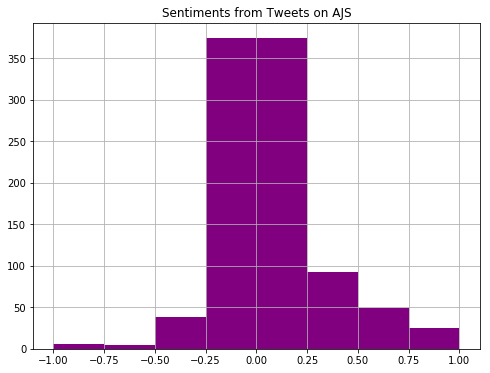

In [243]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on AJS")
plt.show()

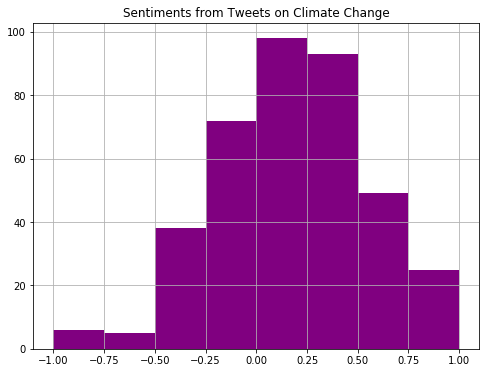

In [244]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Climate Change")
plt.show()

In [246]:
sum(sentiment_df['polarity'])

62.40424315884735